# Seaborn basic 01
## relplot -- 关系图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

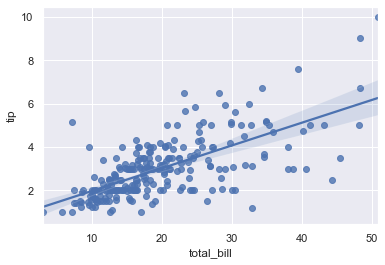

In [4]:
tips = sns.load_dataset('tips')
# df = pd.DataFrame(data={'x': np.arange(0,10), 'y': np.arange(0,10)})
# sns.relplot(x='x', y='y', data=df)
sns.regplot(x='total_bill', y='tip', data=tips)

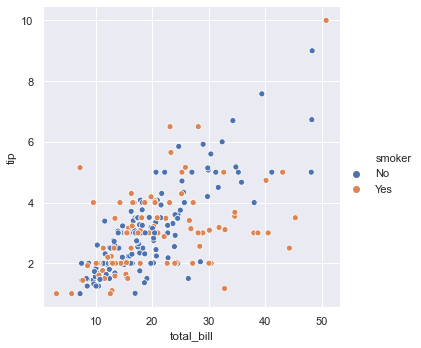

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
# 参数hue根据对字段smoker进行分类来着色

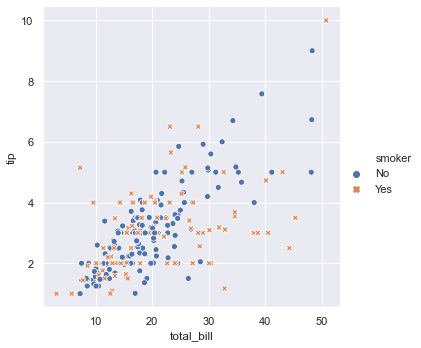

In [8]:
# 强调类别之间的差异并提高可访问性，可以为每个类别使用不同的标记样式，参数style根据字段smoker的类型设置形状
sns.relplot(x="total_bill", y="tip", hue="smoker", style='smoker', data=tips)

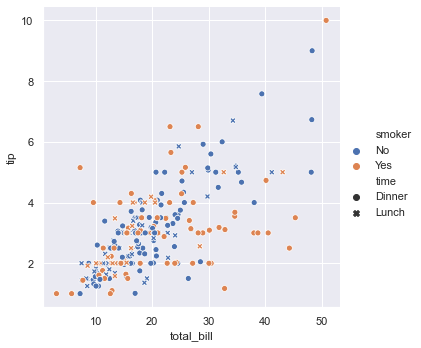

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style='time', data=tips)

色调语义表示**类别**，所以使用了**默认的定性调色板**。如果色调语义表示**数值**(特别是，如果它可以转换为浮点数)，默认的颜色切换到**顺序调色板**

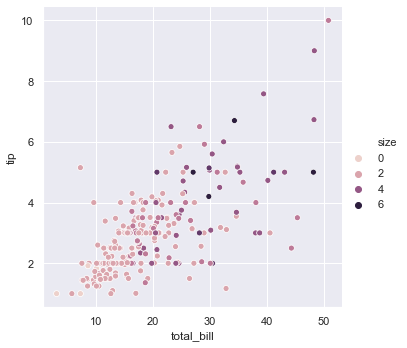

In [11]:
sns.relplot(x='total_bill', y='tip', hue='size', data=tips)

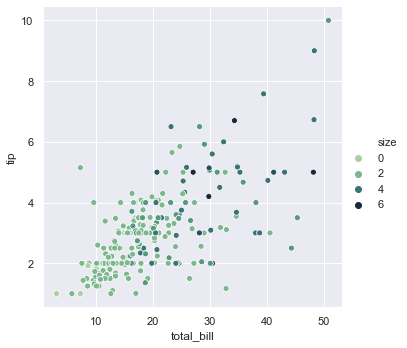

In [12]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

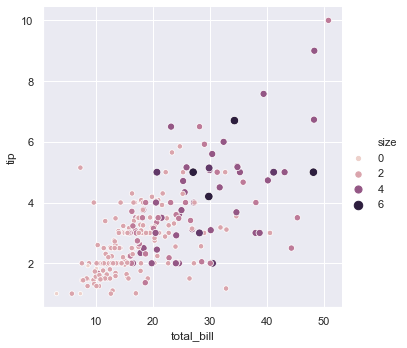

In [14]:
# 语义变量改变点的大小
sns.relplot(x="total_bill", y="tip", size="size", hue='size', data=tips)

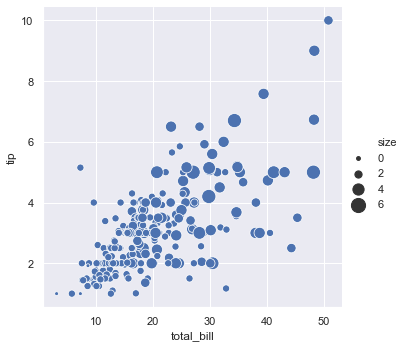

In [15]:
# 可以定义点的面积范围
sns.relplot(x='total_bill', y='tip', size='size', sizes=(15, 200), data=tips)

## 2.线图

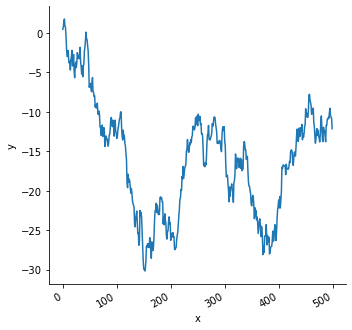

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.DataFrame({'x': np.arange(500), 'y': np.random.randn(500).cumsum()})
g = sns.relplot(x='x', y='y', kind='line', data=df)
g.fig.autofmt_xdate()    # 若标签名称太长则对标签名进行自动旋转，可指定关键字参数rotation=旋转角度

由于lineplot()假设您想要将y绘制为x的函数，默认行为是在绘制之前按数字x对数据进行排序。但是，这可以被禁用

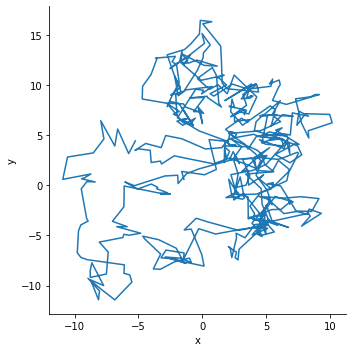

In [4]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x='x', y='y', sort=False, kind='line', data=df)

更复杂的数据集x变量有多个相同的观测值。seaborn的默认行为是通过绘制其对应y值得平均值及95%的置信区间，在周围聚合多个测量值

In [3]:
fmri = sns.load_dataset('fmri')
fmri.head(5)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


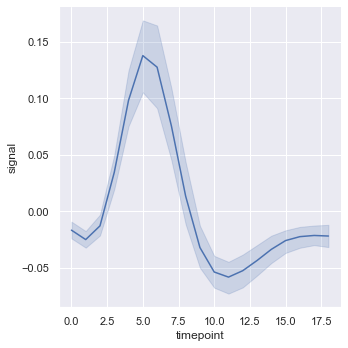

In [10]:
sns.set(style='darkgrid')
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

置信区间是使用bootstrapping计算的，对于较大的数据集，它可能是时间密集型的。因此，可以禁用它们

In [ ]:
sns.relplot(x='timepoint', y='signal', kind='line', ci=None, data=fmri)

尤其是对于较大的数据，另一个不错的选择是通过绘制标准差，而不是置信区间来表示分布在每个时间点的分布范围

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

可以通过设置estimator参数为None，来完全停用聚合。当数据在每个点上有多个观察值时，会出现垂直于x轴的直线

In [ ]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

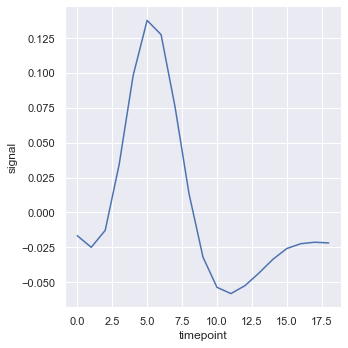

In [11]:
sns.relplot(x='timepoint', y='signal', kind='line', ci=None, data=fmri)

尤其是对于较大的数据，另一个不错的选择是通过绘制标准差，而不是置信区间来表示分布在每个时间点的分布范围

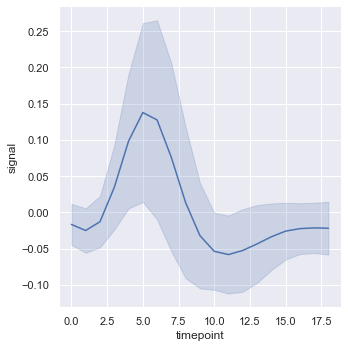

In [12]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

可以通过设置estimator参数为None，来完全停用聚合。当数据在每个点上有多个观察值时，会出现垂直于x轴的直线

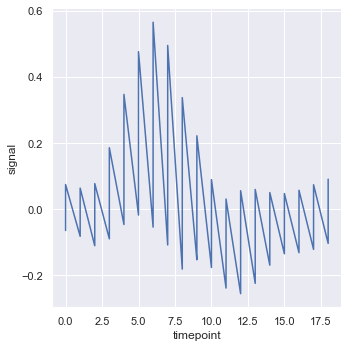

In [14]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

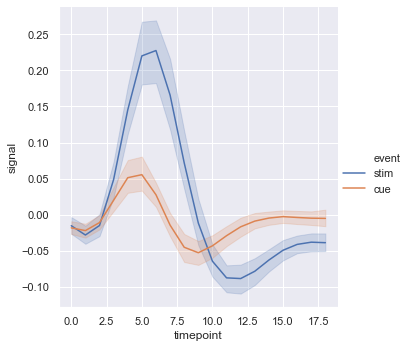

In [4]:
sns.relplot(x='timepoint', y='signal', hue='event', kind='line', data=fmri)

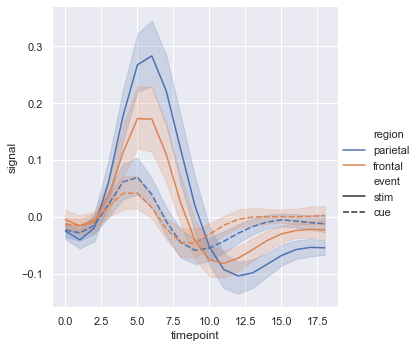

In [6]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event', kind='line', data=fmri)

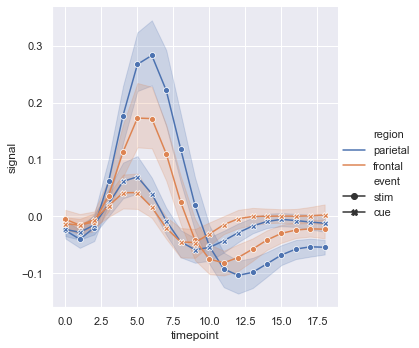

In [9]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event', dashes=False, markers=True, kind='line', data=fmri)

当只检查一个附加变量的变化时，根据相同的字段更改线条的颜色和样式。当打印成黑白或有色盲的人观看时，这可以使绘图更容易访问

通过某一字段绘制多条线段

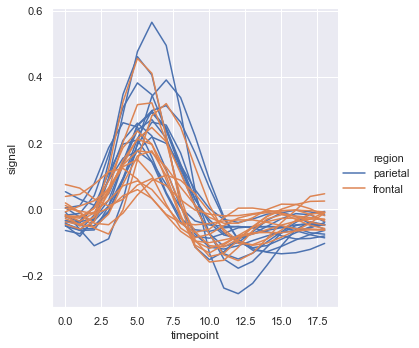

In [14]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"))

和scatter一样，色调模式和分类字段的类型有关，即分类型（对比色）和数值型（渐变色）

In [ ]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

有时设置颜色的字段不以线性方式变化时，可以手动设置调色板，下图设置以对数级变化

In [ ]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)   # 设置调色板，n_color表示有6种颜色，light为亮度，其他参数如start为开始的色相,rot为结束的色相
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

In [ ]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots)         # size改变线的宽度

size变量通常是数值型的，但是也可以用线宽来映射类别变量

In [ ]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

使用日期格式的数据绘图

In [ ]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()      # 自动倾斜

绘制多张子图

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips)

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=5,
            kind="line", estimator=None, data=fmri)

想要检查一个变量的多个级别的效果时，在列上对该变量进行切面处理，然后将切面“包装”到行中:

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

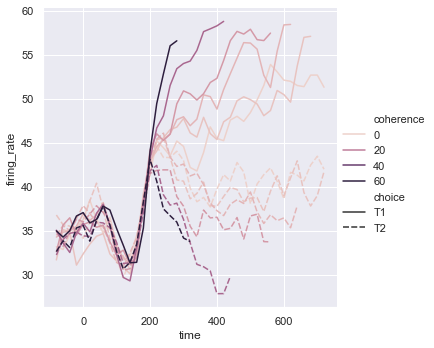

In [15]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

有时设置颜色的字段不以线性方式变化时，可以手动设置调色板，下图设置以对数级变化

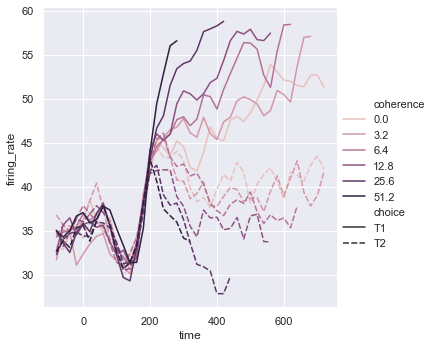

In [16]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)   # 设置调色板，n_color表示有6种颜色，light为亮度，其他参数如start为开始的色相,rot为结束的色相
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

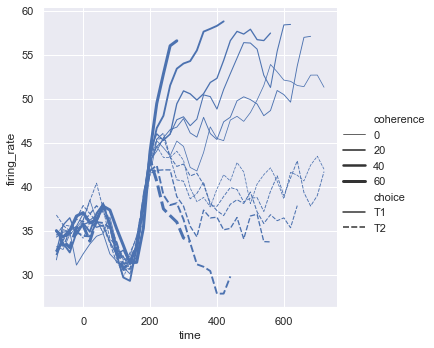

In [17]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots)         # size改变线的宽度

size变量通常是数值型的，但是也可以用线宽来映射类别变量

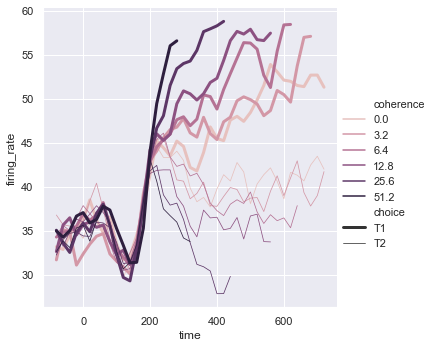

In [18]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

使用日期格式的数据绘图

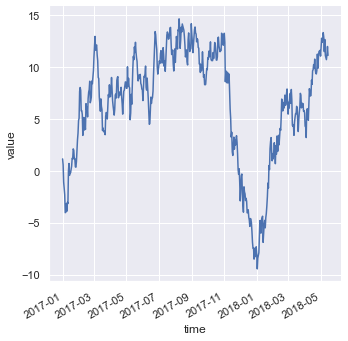

In [21]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()      # 自动倾斜

绘制多张子图

In [22]:
tips = sns.load_dataset('tips')

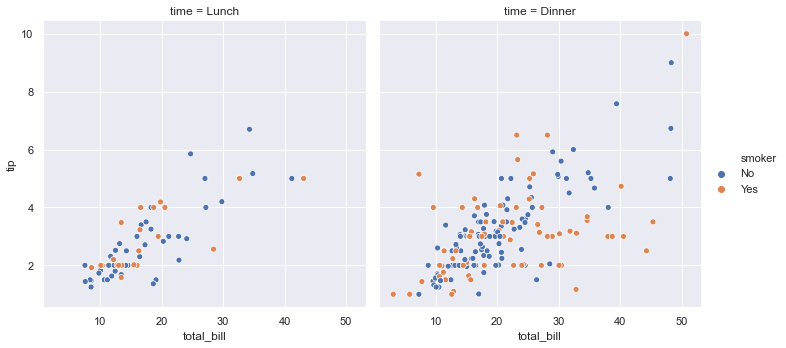

In [23]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips)

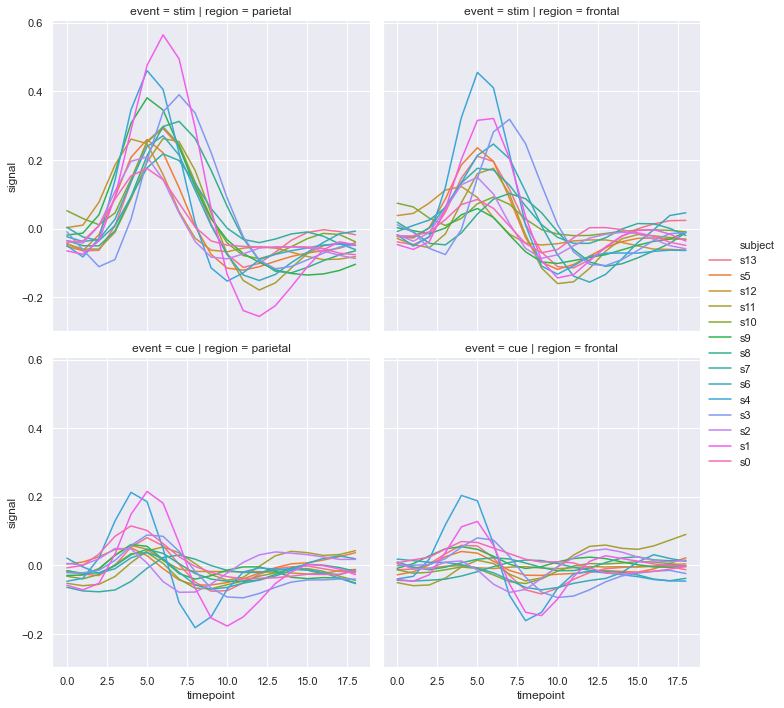

In [27]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=5,
            kind="line", estimator=None, data=fmri)

想要检查一个变量的多个级别的效果时，在列上对该变量进行切面处理，然后将切面“包装”到行中:

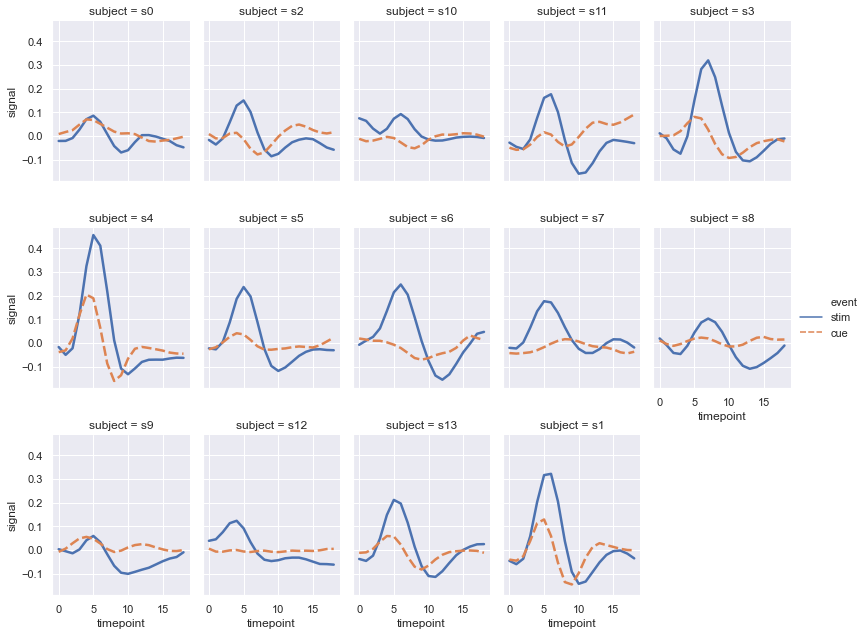

In [35]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))